In [1]:
import numpy as np
import tensorflow as tf
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.8.0'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 25 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6894 - accuracy: 0.6000 - val_loss: 1.2057 - val_accuracy: 0.4074
Epoch 2/50
1/1 [==============================] - 1s 588ms/step - loss: 0.8325 - accuracy: 0.6000 - val_loss: 0.6354 - val_accuracy: 0.7037
Epoch 3/50
1/1 [==============================] - 1s 571ms/step - loss: 0.6165 - accuracy: 0.7200 - val_loss: 0.5955 - val_accuracy: 0.5926
Epoch 4/50
1/1 [==============================] - 1s 556ms/step - loss: 0.6609 - accuracy: 0.4000 - val_loss: 0.5693 - val_accuracy: 0.8519
Epoch 5/50
1/1 [==============================] - 1s 545ms/step - loss: 0.5959 - accuracy: 0.8800 - val_loss: 0.6070 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 1s 577ms/step - loss: 0.5155 - accuracy: 0.8400 - val_loss: 0.7206 - val_accuracy: 0.4444
Epoch 7/50
1/1 [==============================] - 1s 550ms/step - loss: 0.4934 - accuracy: 0.6800 - val_loss: 0.7629 - val_accuracy: 0.4444
Epoch 8/50
1/1 [=======

botpeg


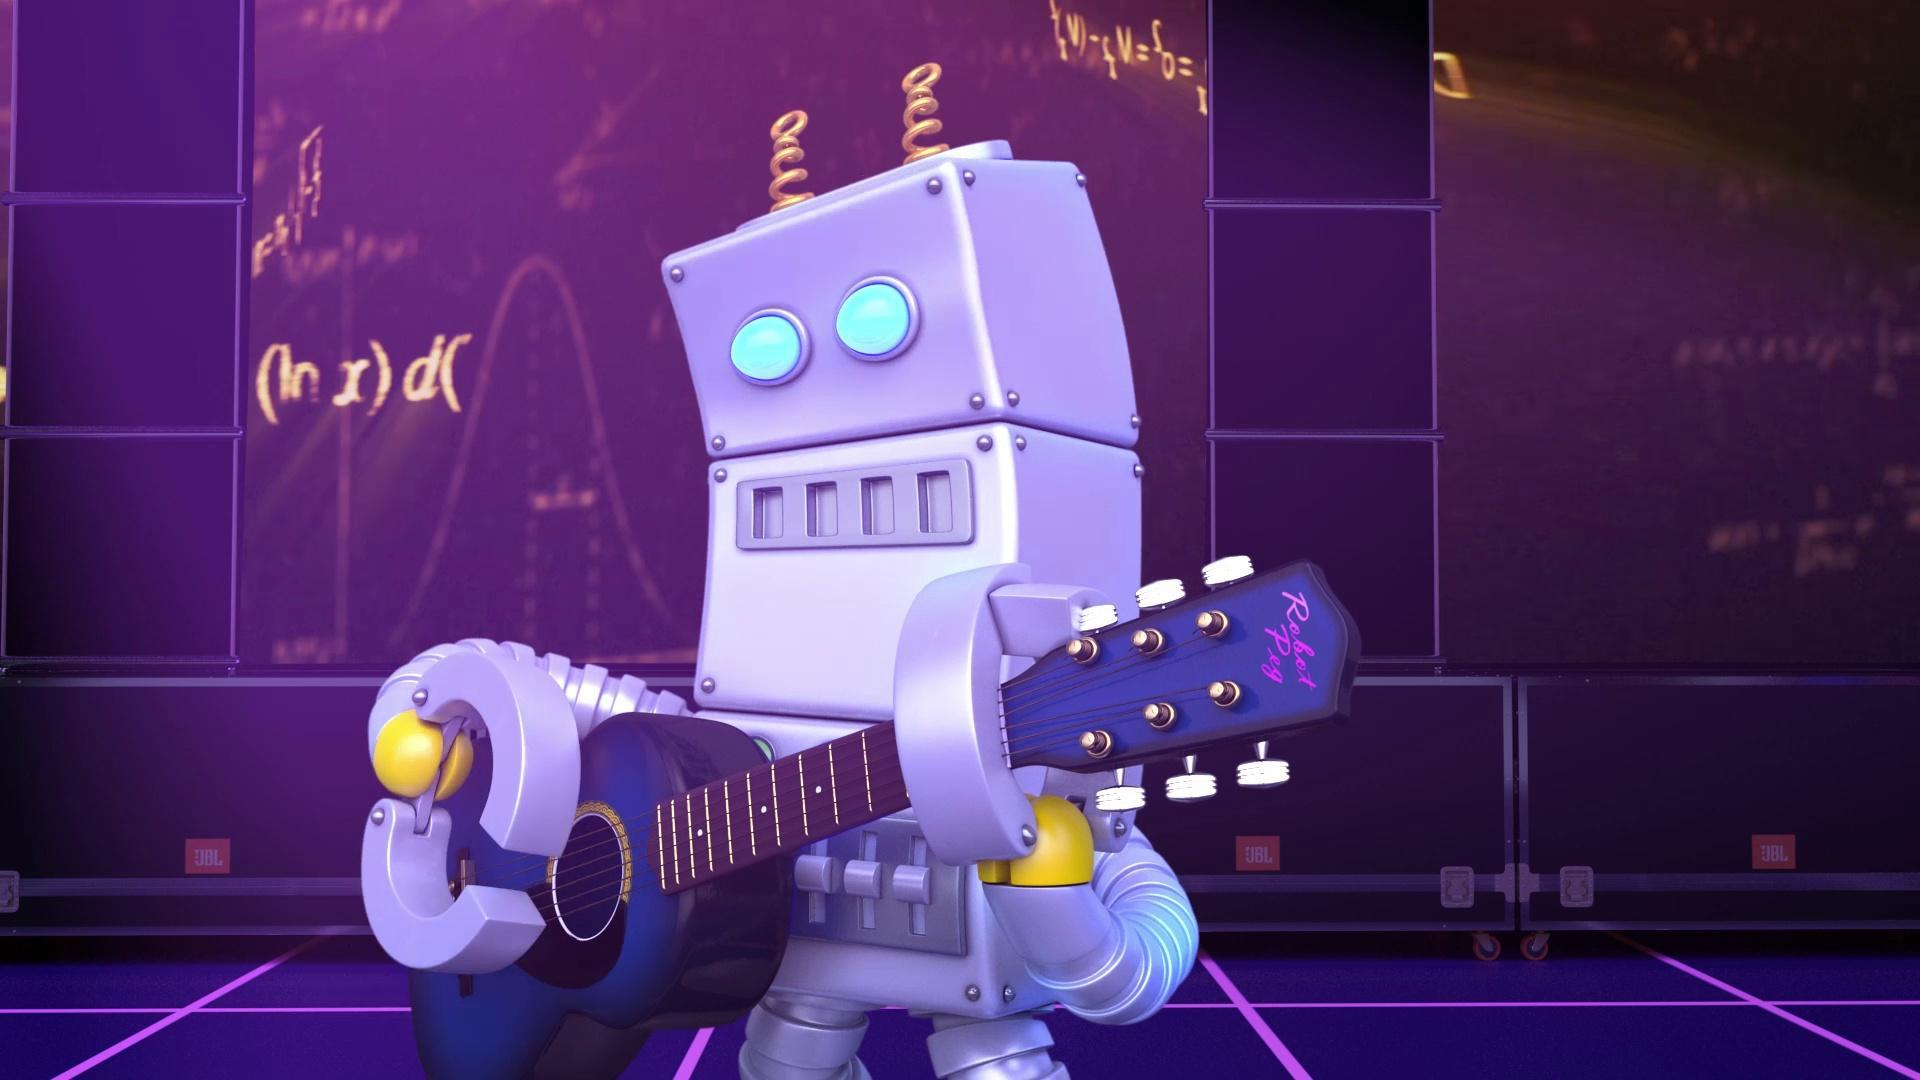

In [5]:
image_path = './botpeg_testing.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'furypeg'
else:
  prediction = 'botpeg'

print(prediction)
Image(image_path)